In [1]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("https://bit.ly/UsersBehaviourTelco")

In [16]:
df.head(5)
# All columns well labelled

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [17]:
df.sample(5)

,calls,minutes,messages,mb_used,is_ultra
1968,98.0,738.62,79.0,21298.68,0
250,68.0,492.75,22.0,20559.09,0
808,25.0,203.33,25.0,22518.06,0
651,18.0,147.93,18.0,1904.01,1
2192,32.0,295.55,73.0,10968.37,0


In [18]:
df.shape

(3214, 5)

In [25]:
# Get the values of the dataframe to an array
arr = df.values
X = arr[:,0:4]
y = arr[:,4]


[0. 0. 0. ... 0. 0. 1.]


In [26]:
# Split the data to training and validation sets
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

In [28]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('RFC', RandomForestClassifier()))

LR: 0.732008 (0.023066)
DTC: 0.713737 (0.013296)
RFC: 0.800473 (0.010642)


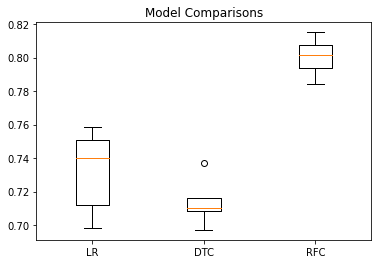

In [29]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Model Comparisons')
pyplot.show()

In [30]:
# Proceeding with Random Forest Classifier which has an accuracy of 80%
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [31]:
#Predict using the model
predictions = model.predict(X_validation)

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [34]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8040435458786936
[[398  30]
 [ 96 119]]
              precision    recall  f1-score   support

         0.0       0.81      0.93      0.86       428
         1.0       0.80      0.55      0.65       215

    accuracy                           0.80       643
   macro avg       0.80      0.74      0.76       643
weighted avg       0.80      0.80      0.79       643

